In [1]:
NZLink="https://github.com/lizBadillo/geodfprepro/raw/main/maps/Nueva_Zelanda_2193.gpkg"

from  fiona import listlayers


#layers in maps
listlayers(NZLink)

['Subdivision', 'Ward', 'airports']

In [2]:
#Leemos todo
# reading in the data:

import os
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

Ward=gpd.read_file(NZLink,layer='Ward')
Subdivision=gpd.read_file(NZLink,layer='Subdivision')
airports=gpd.read_file(NZLink,layer='airports')

#Geopackage con layers 

In [3]:
import pandas as pd 
infoseaports=pd.read_csv(os.path.join("data","UpdatedPub150.csv"))

#columns available (so many)
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [4]:
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3774 non-null   object 
 1   Country Code  3774 non-null   object 
 2   Latitude      3774 non-null   float64
 3   Longitude     3774 non-null   float64
dtypes: float64(2), object(2)
memory usage: 118.1+ KB


In [5]:
infoseaports[240:280]

,portName,Country Code,Latitude,Longitude
240,Midland,Canada,44.750000,-79.916667
241,Huron,United States,41.400000,-82.550000
242,Buffalo,United States,42.883333,-78.883333
243,Baraga,United States,46.783333,-88.483333
244,Lamlash Harbor,United Kingdom,55.533333,-5.116667
245,Ardrossan,United Kingdom,55.650000,-4.816667
246,Alexandria Bay,United States,44.333333,-75.916667
247,Niagara,Canada,43.250000,-79.066667
248,Calcite,United States,45.416667,-83.783333
249,Hommelvik,Norway,63.416667,10.800000


In [6]:
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                 geometry=gpd.points_from_xy(infoseaports.Longitude,
                                             infoseaports.Latitude), 
                 crs=4326)# notice it is unprojected

seaports_nz=seaports[seaports['Country Code']=='New Zealand'].copy()

seaports_nz.reset_index(drop=True, inplace=True)

seaports_nz_2193=seaports_nz.to_crs(2193) # projected crs

<Axes: >

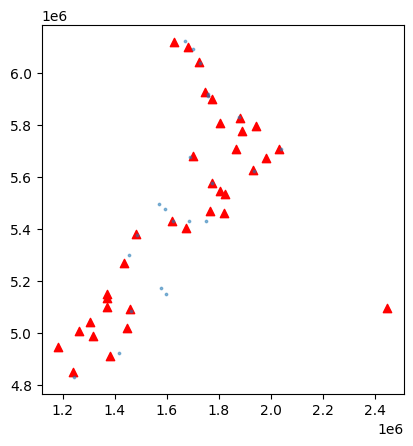

In [22]:
# subsetting
MediumAirports=airports[airports.kind=='medium_airport'] 
MediumAirports.reset_index(drop=True, inplace=True)

#plotting
base=MediumAirports.plot(color='red',marker="^")
seaports_nz_2193.plot(ax=base,alpha=0.5,markersize=3)

In [9]:
seaports_nz_2193

,portName,Country Code,Latitude,Longitude,geometry
0,Collingwood,New Zealand,-40.683333,172.666667,POINT (1571832.419 5496341.598)
1,New Plymouth,New Zealand,-39.066667,174.033333,POINT (1689395.096 5675317.197)
2,Auckland,New Zealand,-36.850000,174.766667,POINT (1757506.391 5920310.843)
3,Timaru,New Zealand,-44.400000,171.250000,POINT (1460640.867 5082209.191)
4,Greymouth,New Zealand,-42.433333,171.216667,POINT (1453312.701 5300568.930)
5,Bluff Harbor,New Zealand,-46.600000,168.333333,POINT (1242596.742 4828698.133)
6,Opua,New Zealand,-35.316667,174.116667,POINT (1701505.738 6091266.986)
7,Akaroa,New Zealand,-43.800000,172.966667,POINT (1597318.596 5150339.789)
8,Whangaroa,New Zealand,-35.050000,173.766667,POINT (1669917.766 6121143.451)
9,Tauranga,New Zealand,-37.633333,176.166667,POINT (1879439.982 5830148.254)


In [23]:
MediumAirports

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Queenstown International Airport,medium_airport,-45.021099,168.738998,1171.0,Otago Region,Queenstown,POINT (1264291.109 5005867.448)
1,Dunedin International Airport,medium_airport,-45.928101,170.197998,4.0,Otago Region,Dunedin,POINT (1382756.350 4910122.882)
2,Nelson Airport,medium_airport,-41.298302,173.220993,17.0,Nelson Region,Nelson,POINT (1618501.809 5428104.177)
3,Rotorua Regional Airport,medium_airport,-38.109200,176.317001,935.0,Bay of Plenty Region,Rotorua,POINT (1890830.541 5776870.117)
4,Hawke's Bay Airport,medium_airport,-39.465801,176.869995,6.0,Hawke's Bay Region,Napier,POINT (1932950.419 5624377.745)
5,Hamilton International Airport,medium_airport,-37.866699,175.332001,172.0,Waikato Region,Hamilton,POINT (1805127.580 5806411.617)
6,Invercargill Airport,medium_airport,-46.412399,168.313004,5.0,Southland Region,Invercargill,POINT (1239800.351 4849447.496)
7,Wanaka Airport,medium_airport,-44.722954,169.248419,1142.0,Otago Region,Wanaka,POINT (1302894.308 5040975.611)
8,Palmerston North Airport,medium_airport,-40.320599,175.617004,151.0,Manawatu-Wanganui Region,Palmerston North,POINT (1822351.184 5533371.416)
9,Tauranga Airport,medium_airport,-37.671902,176.195999,13.0,Bay of Plenty Region,Tauranga,POINT (1881883.041 5825779.656)


In [24]:
# distance between 'Guarulhos' and 'Dtse / Gegua Oil Terminal' in km
MediumAirports.iloc[0].geometry.distance(seaports_nz_2193.iloc[0].geometry)/1000

578.9184311520917

In [25]:
#try 1
seaports_nz_2193.geometry.apply\
(lambda g: MediumAirports.geometry.distance(g)/1000)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,578.918431,615.956284,82.670294,424.801190,383.144182,388.033566,727.129475,528.853373,253.240713,452.394542,...,446.636868,611.695026,215.765800,464.730990,148.328779,477.722971,675.986899,625.198907,570.184276,446.356041
1,793.017255,824.348021,257.177245,225.586422,248.825286,174.870680,940.317073,742.813643,194.488884,244.316517,...,659.864396,422.565531,130.963308,258.265108,362.243040,281.726228,890.032183,448.337534,783.306777,292.263889
2,1038.974513,1077.458728,511.458381,195.833017,344.030529,123.453681,1189.440142,989.900297,392.335274,156.223226,...,909.118487,192.495223,346.181003,14.009886,607.966797,224.319889,1133.265315,238.318165,1032.650503,333.616879
3,210.668671,188.890698,380.214964,817.078306,719.043152,801.960254,320.855948,163.046573,578.257475,854.600495,...,92.152272,1039.699808,582.979539,891.910939,296.983786,861.899754,310.836093,1050.094130,173.827297,787.866051
4,350.111591,396.769852,208.692790,646.749318,578.709330,616.157880,499.097256,300.023973,436.332900,677.878192,...,219.102812,829.714828,420.945673,691.585359,82.926081,697.185274,447.974947,836.657313,342.467573,646.531128
5,178.492609,162.094743,707.525424,1148.580502,1053.420260,1127.991400,20.936950,220.675155,912.512821,1184.423292,...,297.840704,1343.404098,915.129527,1208.328629,599.538276,1194.692877,130.027425,1346.276072,174.323734,1122.230202
6,1170.149046,1223.397959,668.337162,367.000370,521.106710,303.117250,1324.872638,1123.389089,570.833678,320.966499,...,1047.188320,19.562229,521.707966,169.626929,745.911395,382.310099,1259.395459,80.336987,1169.698551,503.243413
7,363.014551,322.088682,278.570968,691.873915,580.827604,688.196787,467.285209,314.079901,444.244182,732.936517,...,233.416533,951.369047,459.062518,791.079021,255.664621,732.676164,463.553332,969.264324,326.003033,648.925315
8,1186.749152,1244.601341,694.943909,409.055721,562.105278,342.546087,1342.464745,1140.819347,607.216529,363.550615,...,1066.251620,26.767225,556.294260,207.916033,766.152739,425.479778,1274.254228,43.790227,1188.123522,545.731603
9,1028.516886,1045.533986,479.299666,54.482150,212.614367,78.011288,1170.859869,977.342507,302.217839,5.005315,...,892.045127,331.984952,276.962314,165.588738,601.776010,73.211114,1127.605091,384.292815,1014.403497,187.288685


In [26]:
# try 2
seaports_nz_2193.set_index('portName').geometry.apply\
(lambda g: MediumAirports.set_index('name').geometry.distance(g)/1000)

name,Queenstown International Airport,Dunedin International Airport,Nelson Airport,Rotorua Regional Airport,Hawke's Bay Airport,Hamilton International Airport,Invercargill Airport,Wanaka Airport,Palmerston North Airport,Tauranga Airport,...,Pukaki Airport,Kerikeri Airport,Wanganui Airport,RNZAF Base Auckland-Whenuapai,Westport Airport,Whakatane Airport,Manapouri Airport,Kaitaia Airport,Alexandra Aerodrome,Wairoa Airport
portName,,,,,,,,,,,,,,,,,,,,,
Collingwood,578.918431,615.956284,82.670294,424.801190,383.144182,388.033566,727.129475,528.853373,253.240713,452.394542,...,446.636868,611.695026,215.765800,464.730990,148.328779,477.722971,675.986899,625.198907,570.184276,446.356041
New Plymouth,793.017255,824.348021,257.177245,225.586422,248.825286,174.870680,940.317073,742.813643,194.488884,244.316517,...,659.864396,422.565531,130.963308,258.265108,362.243040,281.726228,890.032183,448.337534,783.306777,292.263889
Auckland,1038.974513,1077.458728,511.458381,195.833017,344.030529,123.453681,1189.440142,989.900297,392.335274,156.223226,...,909.118487,192.495223,346.181003,14.009886,607.966797,224.319889,1133.265315,238.318165,1032.650503,333.616879
Timaru,210.668671,188.890698,380.214964,817.078306,719.043152,801.960254,320.855948,163.046573,578.257475,854.600495,...,92.152272,1039.699808,582.979539,891.910939,296.983786,861.899754,310.836093,1050.094130,173.827297,787.866051
Greymouth,350.111591,396.769852,208.692790,646.749318,578.709330,616.157880,499.097256,300.023973,436.332900,677.878192,...,219.102812,829.714828,420.945673,691.585359,82.926081,697.185274,447.974947,836.657313,342.467573,646.531128
Bluff Harbor,178.492609,162.094743,707.525424,1148.580502,1053.420260,1127.991400,20.936950,220.675155,912.512821,1184.423292,...,297.840704,1343.404098,915.129527,1208.328629,599.538276,1194.692877,130.027425,1346.276072,174.323734,1122.230202
Opua,1170.149046,1223.397959,668.337162,367.000370,521.106710,303.117250,1324.872638,1123.389089,570.833678,320.966499,...,1047.188320,19.562229,521.707966,169.626929,745.911395,382.310099,1259.395459,80.336987,1169.698551,503.243413
Akaroa,363.014551,322.088682,278.570968,691.873915,580.827604,688.196787,467.285209,314.079901,444.244182,732.936517,...,233.416533,951.369047,459.062518,791.079021,255.664621,732.676164,463.553332,969.264324,326.003033,648.925315
Whangaroa,1186.749152,1244.601341,694.943909,409.055721,562.105278,342.546087,1342.464745,1140.819347,607.216529,363.550615,...,1066.251620,26.767225,556.294260,207.916033,766.152739,425.479778,1274.254228,43.790227,1188.123522,545.731603


In [27]:
#try 3
seaports_nz_2193.set_index('portName').geometry.apply\
(lambda g: MediumAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

name,Alexandra Aerodrome,Ardmore Airport,Chatham Islands / Tuuta Airport,Dunedin International Airport,Gisborne Airport,Glentanner Airport,Hamilton International Airport,Hawke's Bay Airport,Hokitika Airfield,Hood Airport,...,Taupo Airport,Tauranga Airport,Timaru Airport,Wairoa Airport,Wanaka Airport,Wanganui Airport,Westport Airport,Whakatane Airport,Whangarei Airport,Woodbourne Airport
portName,,,,,,,,,,,,,,,,,,,,,
Akaroa,326.003033,770.555064,851.965421,322.088682,708.443864,228.493619,688.196787,580.827604,201.080184,382.968037,...,619.537480,732.936517,150.285924,648.925315,314.079901,459.062518,255.664621,732.676164,899.310395,263.959551
Auckland,1032.650503,27.119882,1075.904158,1077.458728,347.481818,876.456480,123.453681,344.030529,726.768103,464.051623,...,239.729056,156.223226,879.749478,333.616879,989.900297,346.181003,607.966797,224.319889,125.246280,523.899264
Bluff Harbor,174.323734,1196.533294,1233.901213,162.094743,1183.076454,331.021562,1127.991400,1053.420260,480.521932,857.185056,...,1078.725744,1184.423292,341.195157,1122.230202,220.675155,915.129527,599.538276,1194.692877,1303.918891,717.710253
Collingwood,570.184276,452.136545,963.328453,615.956284,507.949445,414.647696,388.033566,383.144182,265.328030,252.359753,...,363.831253,452.394542,419.019612,446.356041,528.853373,215.765800,148.328779,477.722971,565.113698,137.120451
Gisborne,1020.982937,325.140002,737.514284,1032.589350,4.839942,881.018695,252.751482,134.383375,745.974558,328.694434,...,169.955150,195.462481,845.228356,66.321791,992.746635,296.864707,646.572561,128.434125,457.919895,475.870986
Greymouth,342.467573,680.538121,1015.234952,396.769852,709.184802,186.094167,616.157880,578.709330,36.479987,401.659474,...,581.099776,677.878192,207.668652,646.531128,300.023973,420.945673,82.926081,697.185274,787.907816,242.167545
Manukau Harbor,1024.847421,19.987814,1067.958185,1069.230604,340.858827,868.739803,114.416151,335.403488,719.060243,454.686011,...,230.916136,149.711578,871.486202,325.908650,982.280989,336.859727,600.321265,218.190936,134.531176,514.969216
Napier,888.771613,321.239615,734.128212,902.325395,129.501819,748.325135,226.433361,4.467124,613.730602,198.420618,...,109.633004,210.822716,713.499795,67.825909,860.133281,170.749796,516.253394,173.657090,469.890829,343.183056
Nelson,540.256808,492.810215,891.237352,573.883835,495.641394,390.221391,417.003940,365.571054,248.052418,201.442841,...,369.519931,471.951016,376.229181,432.989114,504.613648,207.599203,150.225998,485.930315,617.486207,57.659547


In [28]:
distanceMatrixKM_sea_air= seaports_nz_2193.set_index('portName').geometry.apply\
                          (lambda g: MediumAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

In [30]:
# La distancia media desde un seaport a un aeropuerto de tamaño "medio"
distanceMatrixKM_sea_air.mean(axis=1).sort_values(ascending=True)

portName
Wanganui          411.884294
Picton            414.054076
Nelson            417.324098
Wellington        419.175630
Tarakohe          422.877877
Collingwood       428.963495
New Plymouth      435.537991
Westport          452.812421
Napier            469.877884
Greymouth         470.505601
Port Lyttelton    491.093789
Akaroa            501.930567
Tauranga          514.034883
Timaru            533.833943
Manukau Harbor    543.101746
Gisborne          548.233224
Auckland          549.285945
Whangarei         636.212179
Otago Harbor      641.792976
Opua              681.289302
Whangaroa         709.212866
Bluff Harbor      774.471115
dtype: float64

In [31]:
SomeStats=pd.DataFrame()
SomeStats['mean']=distanceMatrixKM_sea_air.mean(axis=1)
SomeStats['min']=distanceMatrixKM_sea_air.min(axis=1)
SomeStats['max']=distanceMatrixKM_sea_air.max(axis=1)
SomeStats.head()

,mean,min,max
portName,,,
Akaroa,501.930567,150.285924,969.264324
Auckland,549.285945,14.009886,1189.440142
Bluff Harbor,774.471115,20.936950,1346.276072
Collingwood,428.963495,82.670294,963.328453
Gisborne,548.233224,4.839942,1172.410757


In [32]:
# El aeropuerto más lejano por cada seaport
distanceMatrixKM_sea_air.idxmax(axis="columns")

portName
Akaroa                            Kaitaia Airport
Auckland                     Invercargill Airport
Bluff Harbor                      Kaitaia Airport
Collingwood       Chatham Islands / Tuuta Airport
Gisborne                     Invercargill Airport
Greymouth         Chatham Islands / Tuuta Airport
Manukau Harbor               Invercargill Airport
Napier                       Invercargill Airport
Nelson            Chatham Islands / Tuuta Airport
New Plymouth      Chatham Islands / Tuuta Airport
Opua                         Invercargill Airport
Otago Harbor                      Kaitaia Airport
Picton            Chatham Islands / Tuuta Airport
Port Lyttelton                    Kaitaia Airport
Tarakohe          Chatham Islands / Tuuta Airport
Tauranga                     Invercargill Airport
Timaru                            Kaitaia Airport
Wanganui                     Invercargill Airport
Wellington        Chatham Islands / Tuuta Airport
Westport          Chatham Islands / Tuuta

In [33]:
# El seaport más lejano por cada aeropuerto
distanceMatrixKM_sea_air.idxmax(axis="rows")

name
Alexandra Aerodrome                    Whangaroa
Ardmore Airport                     Bluff Harbor
Chatham Islands / Tuuta Airport        Whangaroa
Dunedin International Airport          Whangaroa
Gisborne Airport                    Bluff Harbor
Glentanner Airport                     Whangaroa
Hamilton International Airport      Bluff Harbor
Hawke's Bay Airport                 Bluff Harbor
Hokitika Airfield                      Whangaroa
Hood Airport                        Bluff Harbor
Invercargill Airport                   Whangaroa
Kaitaia Airport                     Bluff Harbor
Kerikeri Airport                    Bluff Harbor
Manapouri Airport                      Whangaroa
Mount Cook Airport                     Whangaroa
Nelson Airport                      Bluff Harbor
New Plymouth Airport                Bluff Harbor
Oamaru Airport                         Whangaroa
Palmerston North Airport            Bluff Harbor
Paraparaumu Airport                 Bluff Harbor
Pukaki Airport 

In [34]:
#Aeropuerto más cercano por cada seaport
distanceMatrixKM_sea_air.idxmin(axis="columns")

portName
Akaroa                           Timaru Airport
Auckland          RNZAF Base Auckland-Whenuapai
Bluff Harbor               Invercargill Airport
Collingwood                      Nelson Airport
Gisborne                       Gisborne Airport
Greymouth                     Hokitika Airfield
Manukau Harbor                  Ardmore Airport
Napier                      Hawke's Bay Airport
Nelson                           Nelson Airport
New Plymouth               New Plymouth Airport
Opua                           Kerikeri Airport
Otago Harbor      Dunedin International Airport
Picton                       Woodbourne Airport
Port Lyttelton                   Timaru Airport
Tarakohe                         Nelson Airport
Tauranga                       Tauranga Airport
Timaru                           Timaru Airport
Wanganui                       Wanganui Airport
Wellington                  Paraparaumu Airport
Westport                       Westport Airport
Whangarei                     W

In [35]:
# El seapuerto más cercano por cada aeropuerto
distanceMatrixKM_sea_air.idxmin(axis="rows")

name
Alexandra Aerodrome                   Otago Harbor
Ardmore Airport                     Manukau Harbor
Chatham Islands / Tuuta Airport             Napier
Dunedin International Airport         Otago Harbor
Gisborne Airport                          Gisborne
Glentanner Airport                          Timaru
Hamilton International Airport            Tauranga
Hawke's Bay Airport                         Napier
Hokitika Airfield                        Greymouth
Hood Airport                            Wellington
Invercargill Airport                  Bluff Harbor
Kaitaia Airport                          Whangaroa
Kerikeri Airport                              Opua
Manapouri Airport                     Bluff Harbor
Mount Cook Airport                          Timaru
Nelson Airport                              Nelson
New Plymouth Airport                  New Plymouth
Oamaru Airport                              Timaru
Palmerston North Airport                  Wanganui
Paraparaumu Airport       

In [38]:
#Descargando railroads de Nueva zelanda, para poder calcular la distancia entre líneas y puntos
#Abriendo los shapefile de las vías férreas 
railroad=gpd.read_file(os.path.join("maps","New Zeland_Railroads","New Zeland_Railroads.shp"))